In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('dataset/Sleep_Efficiency.csv', index_col = 0)

In [3]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 1 to 452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     438 non-null    float64
 12  Smoking status          452 non-null    object 
 13  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory usage

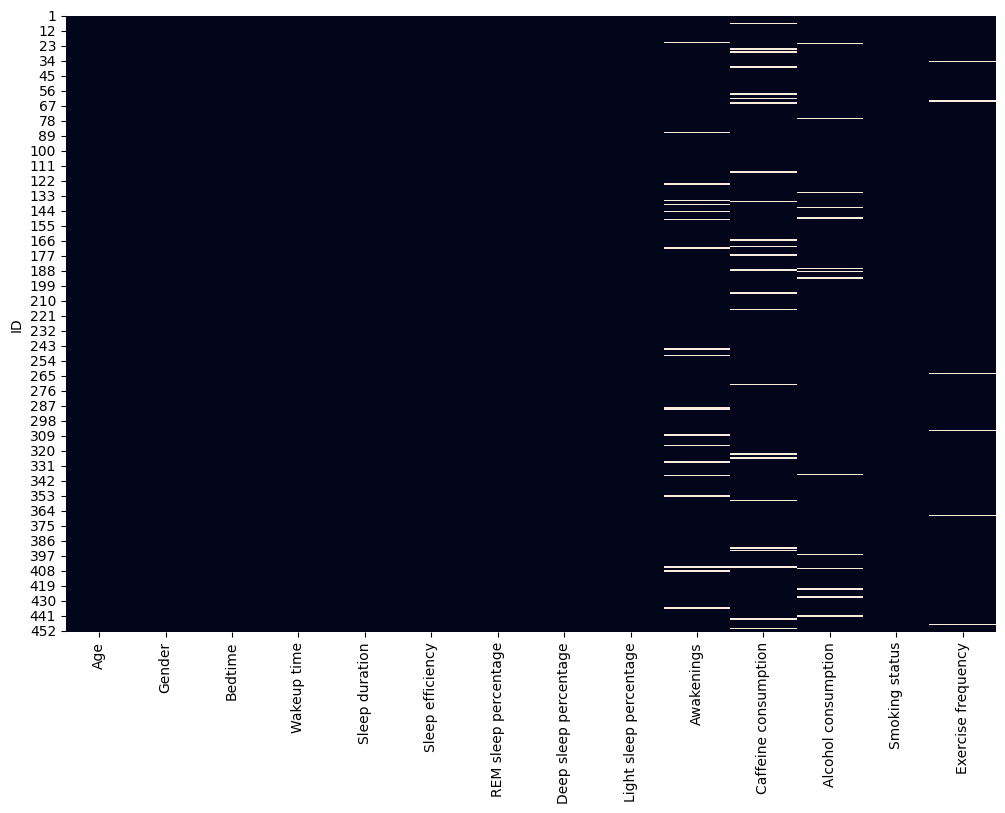

In [4]:
fig, axes = plt.subplots(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [5]:
print(f"{df.shape[0] - df.dropna().shape[0]} rows would be dropped if all rows with nulls were excluded")
print(f"{((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100 :.1f}% of data would be lost if all rows with nulls were dropped")

64 rows would be dropped if all rows with nulls were excluded
14.2% of data would be lost if all rows with nulls were dropped


In [6]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])

In [7]:
# Hour and Minute Fields for Bedtime and Wakeup Time

df['Bedime_Hour'] = [x.time().hour for x in df['Bedtime']]
df['Bedime_Minutes'] = [x.time().minute for x in df['Bedtime']]

df['Wakeup_Hour'] = [x.time().hour for x in df['Wakeup time']]
df['Wakeup_Minutes'] = [x.time().minute for x in df['Wakeup time']]

In [8]:
df.describe()

,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Bedime_Hour,Bedime_Minutes,Wakeup_Hour,Wakeup_Minutes
count,452.000000,452,452,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,2021-07-13 00:03:39.026548480,2021-07-12 20:19:22.831858176,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480,10.661504,10.685841,6.898230,12.212389
min,9.000000,2021-01-03 00:30:00,2021-01-03 08:30:00,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,29.000000,2021-04-14 01:07:30,2021-04-14 07:52:30,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
50%,40.000000,2021-07-20 23:30:00,2021-07-20 16:00:00,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000,2.000000,0.000000,7.000000,0.000000
75%,52.000000,2021-10-11 05:22:30,2021-10-11 05:52:30,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000,22.000000,30.000000,9.000000,30.000000
max,69.000000,2021-12-31 21:00:00,2021-12-31 06:30:00,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000,23.000000,30.000000,12.000000,30.000000
std,13.172250,NaN,NaN,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134,10.571812,14.382130,1.966075,14.755029


Feature Distributions

In [9]:
df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedime_Hour,Bedime_Minutes,Wakeup_Hour,Wakeup_Minutes
ID,,,,,,,,,,,,,,,,,,
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1,0,7,0
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,2,0,9,0
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,21,30,5,30
4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,2,30,8,30
5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,0,9,0


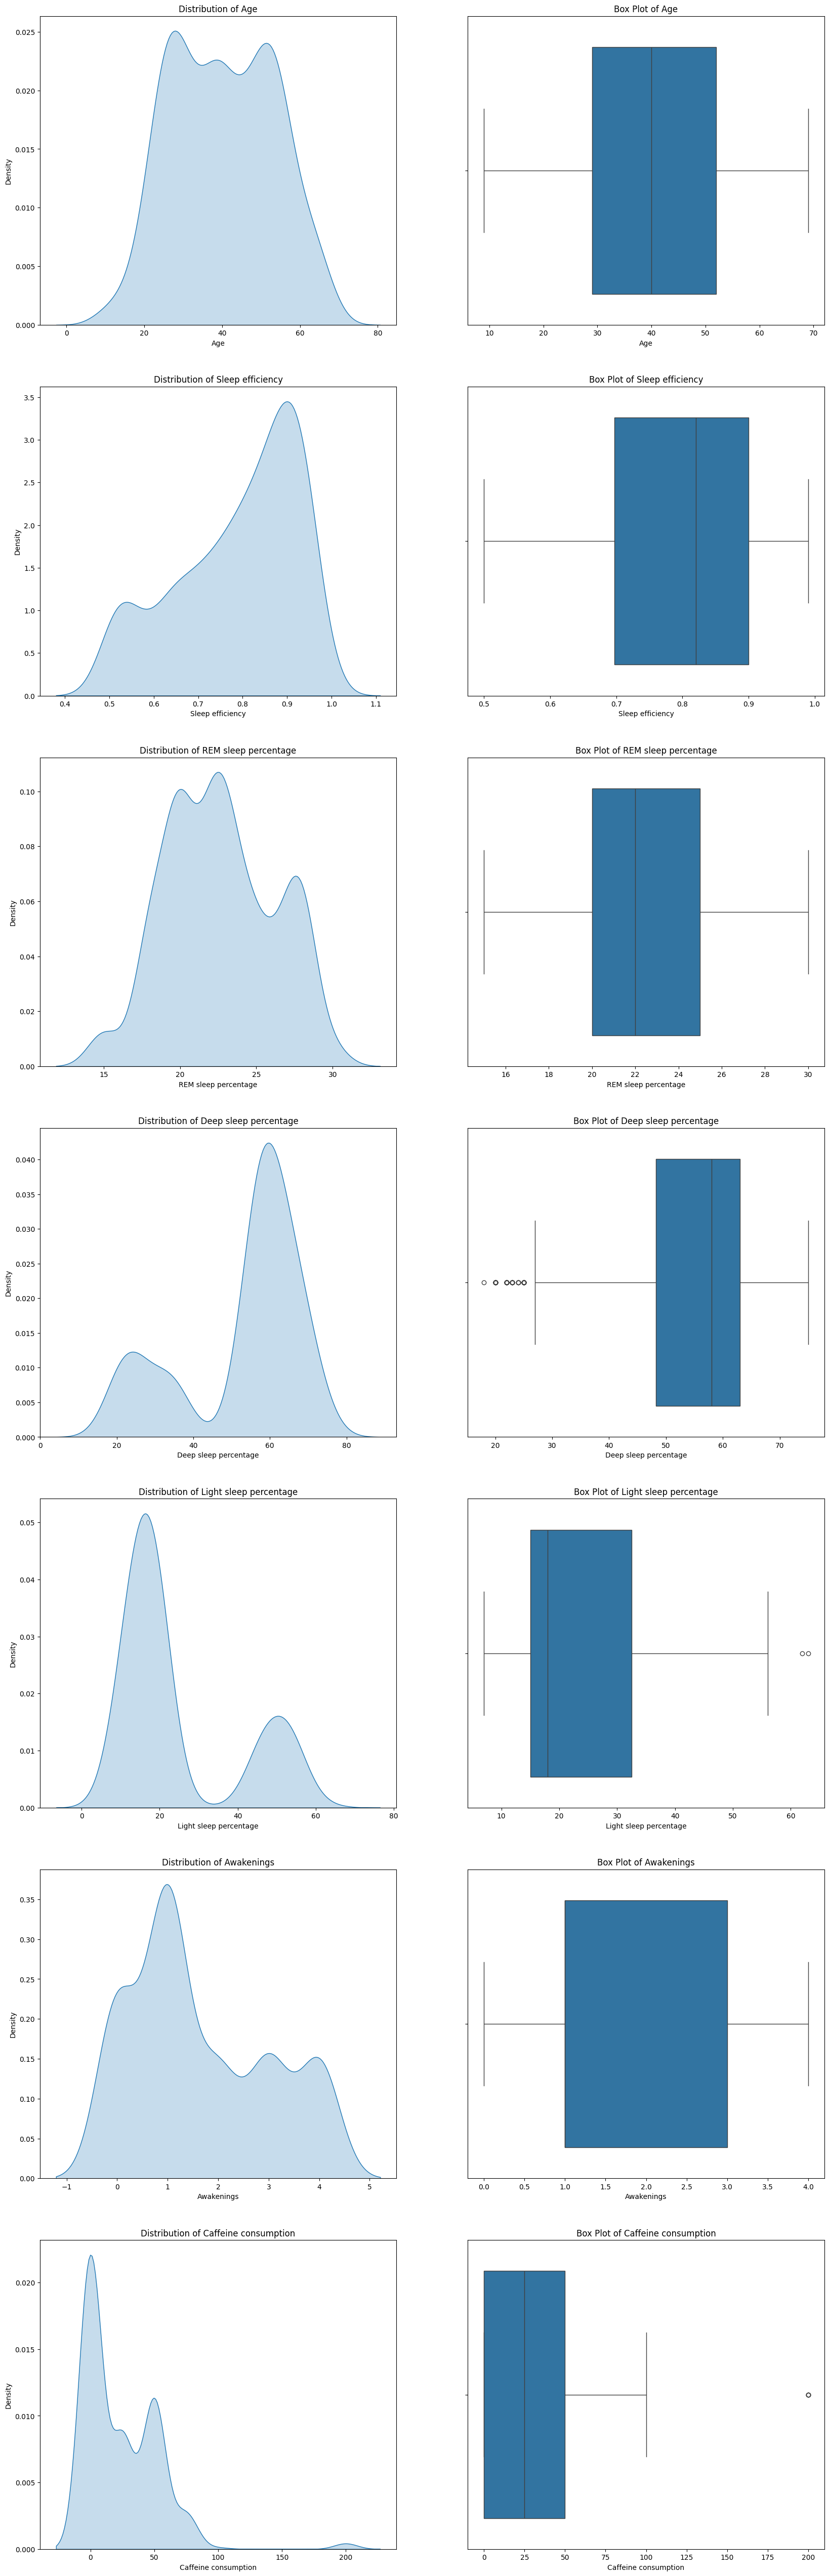

In [10]:
fig, ax = plt.subplots(7,2, figsize=(20,65))
idx = 0

features = ['Age', 'Sleep efficiency', 'REM sleep percentage',
            'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
            'Caffeine consumption']

for column in (features):
    sns.kdeplot(data=df, x=column, fill=True, ax=ax[idx][0]).set_title(f'Distribution of {column}', fontsize='12')
    sns.boxplot(data=df, x=column, orient='h', ax=ax[idx][1]).set_title(f'Box Plot of {column}', fontsize='12')
    idx +=1

plt.show()

Linear Correlations
High linear correlation between Light sleep percentage, Deep sleep percentage, and Sleep efficiency
High linear correlation between Wakeup_hour and Bedtime_hour

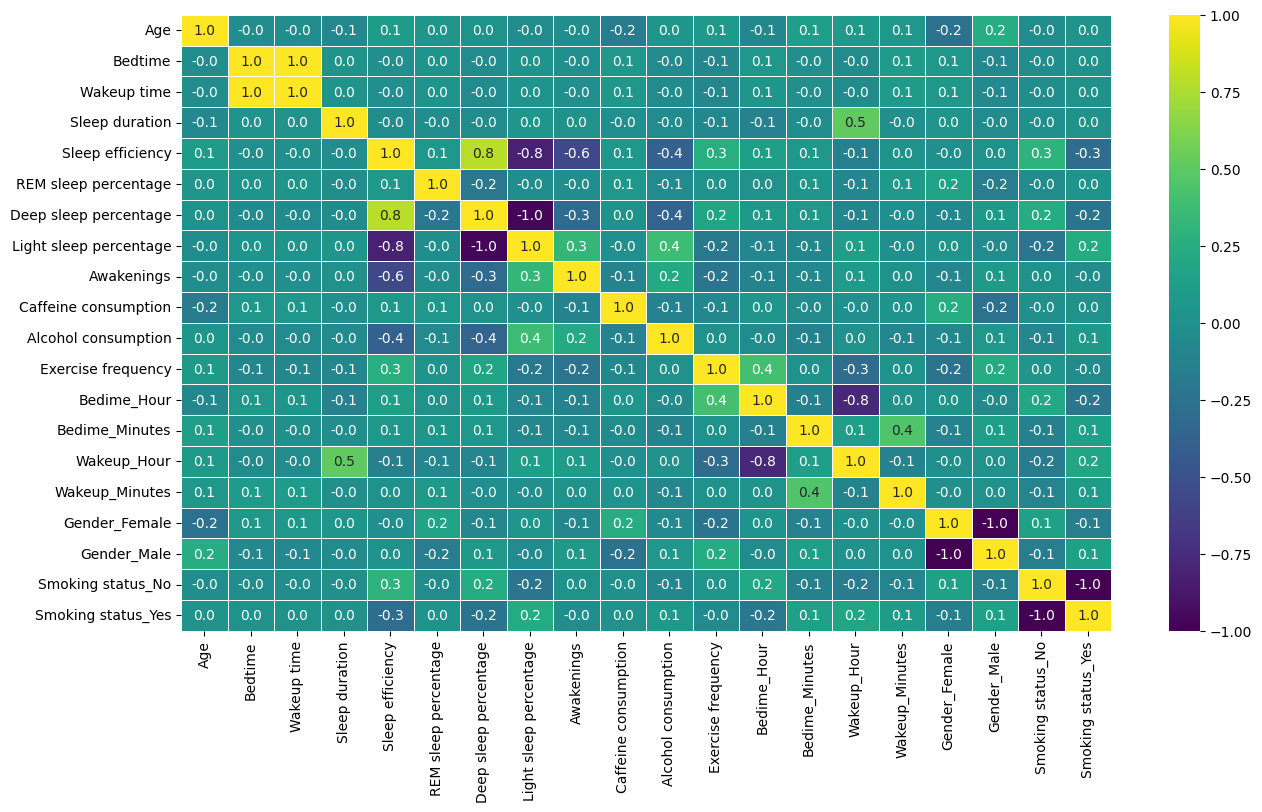

In [11]:
# One-hot encode categorical columns
encoded_df = pd.get_dummies(df)

# Create a correlation matrix
corr_matrix = encoded_df.corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data=corr_matrix,
            annot=True,
            fmt='.1f',
            linewidth=.5,
            vmax=1,
            vmin=-1,
            cmap='viridis')
plt.show()


Summing percentages of sleep
Deep sleep, light sleep, and REM sleep stage percentages don't always add up to 100%

C:\Users\Zawad\AppData\Local\Temp\ipykernel_5404\2466317210.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df['Deep sleep percentage'] + df['Light sleep percentage']  + df['REM sleep percentage'],


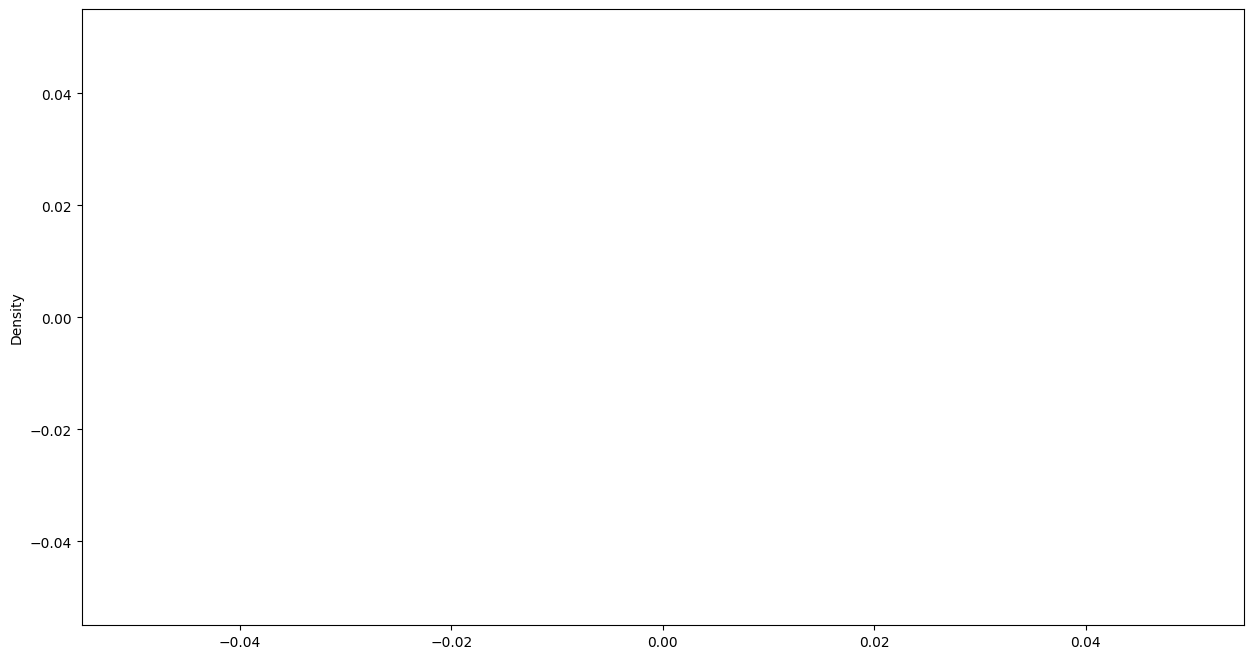

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df['Deep sleep percentage'] + df['Light sleep percentage']  + df['REM sleep percentage'],
           fill = True)
plt.show()

In [13]:
imputer = SimpleImputer(strategy = "most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

Grading Sleep Categories
Assigning Pass (1) or Fail (0) for each sleep measurement
Summing the score of all measurements to grade each person's sleep quality (0 = Poor, 5 = Great)

In [14]:
# Getting at least 7 hours of sleep
df['sleep_duration_grade'] = [int(x >= 7) for x in df['Sleep duration']]

# Deep sleep between 13% and 23% of sleep
df['deep_sleep_grade'] = [int((x >= 13 and x <= 23)) for x in df['Deep sleep percentage']]

# Light sleep between 45% and 55% of sleep
df['light_sleep_grade'] = [int((x >= 45 and x <= 55)) for x in df['Light sleep percentage']]

# Waking up 1 or less times
df['awakenings_grade'] = [int(x <= 1) for x in df['Awakenings']]

# Asleep for at least 85% of the night
df['sleep_efficiency_grade'] = [int(x >= .85) for x in df['Sleep efficiency']]

# Summing each grade
df['sleep_quality'] = df['sleep_duration_grade'] + df['deep_sleep_grade'] + \
                      df['light_sleep_grade'] + df['awakenings_grade'] + \
                      df['sleep_efficiency_grade']

Distribution of Sleep Quality Scores
No one achieved a perfect sleep quality score of 5
Most achieved a score of 3

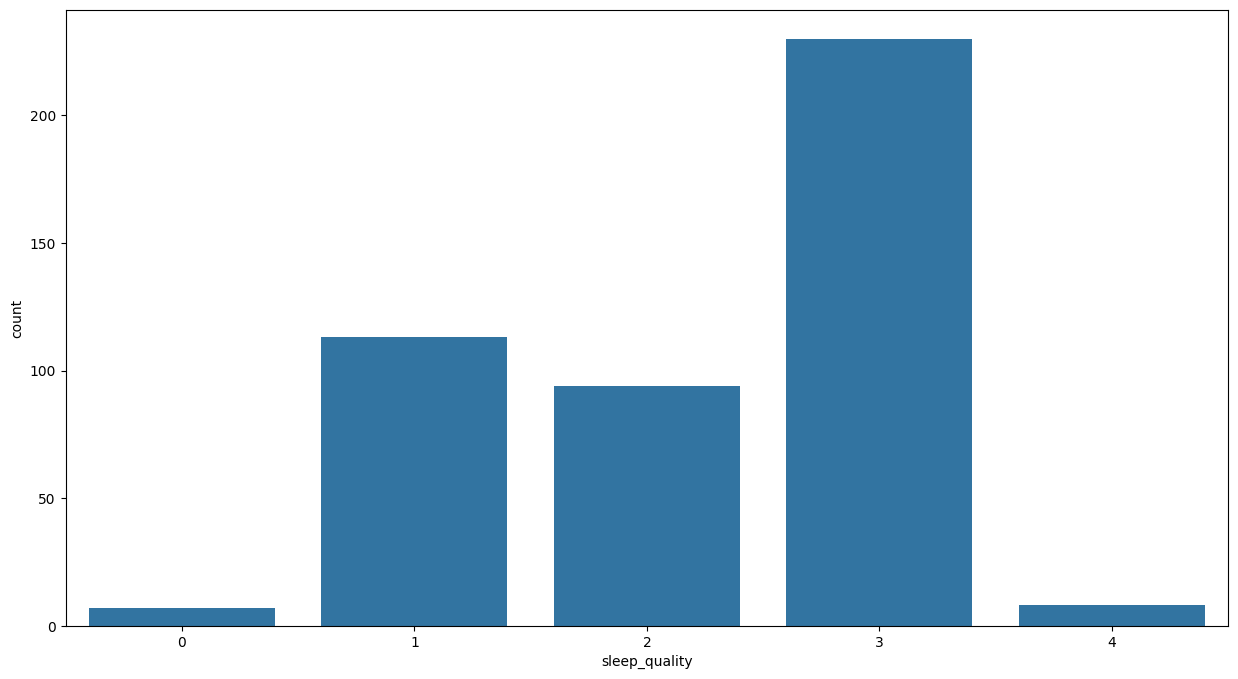

In [15]:
fig, ax = plt.subplots(figsize = (15, 8)) 
sns.countplot(data = df,
              x = 'sleep_quality')
plt.show()

Sleep quality scores by each sleep measurement
Of the people who achieved a sleep quality score of 4, they:
Had the least amount of awakenings
Had the highest % of light sleep
Had the lowest % of deep sleep

C:\Users\Zawad\AppData\Local\Temp\ipykernel_5404\3489067574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.catplot(data = df,
C:\Users\Zawad\AppData\Local\Temp\ipykernel_5404\3489067574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.catplot(data = df,
C:\Users\Zawad\AppData\Local\Temp\ipykernel_5404\3489067574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.catplot(data = df,
C:\Users\Zawad\AppData\Local\Temp\ipykernel_5404\3489067574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

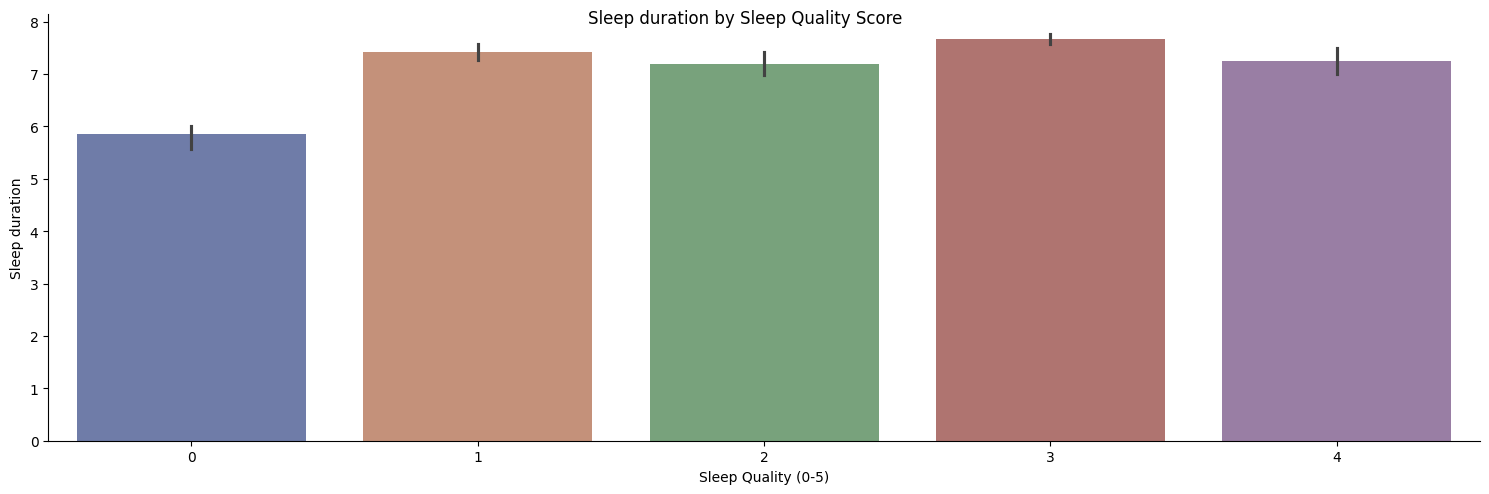

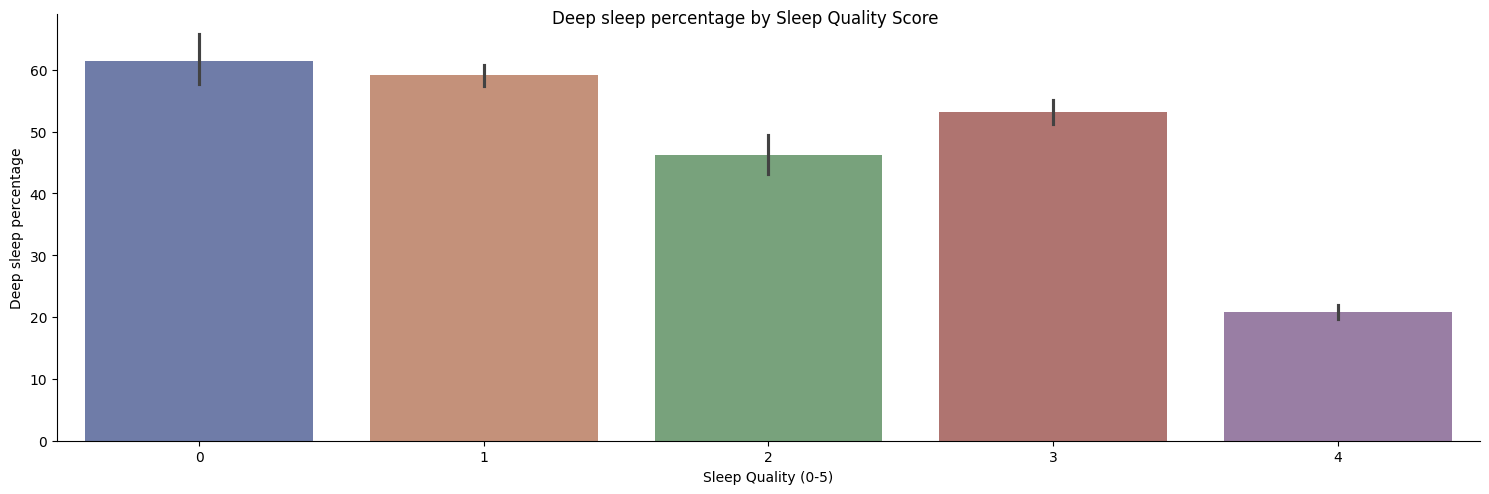

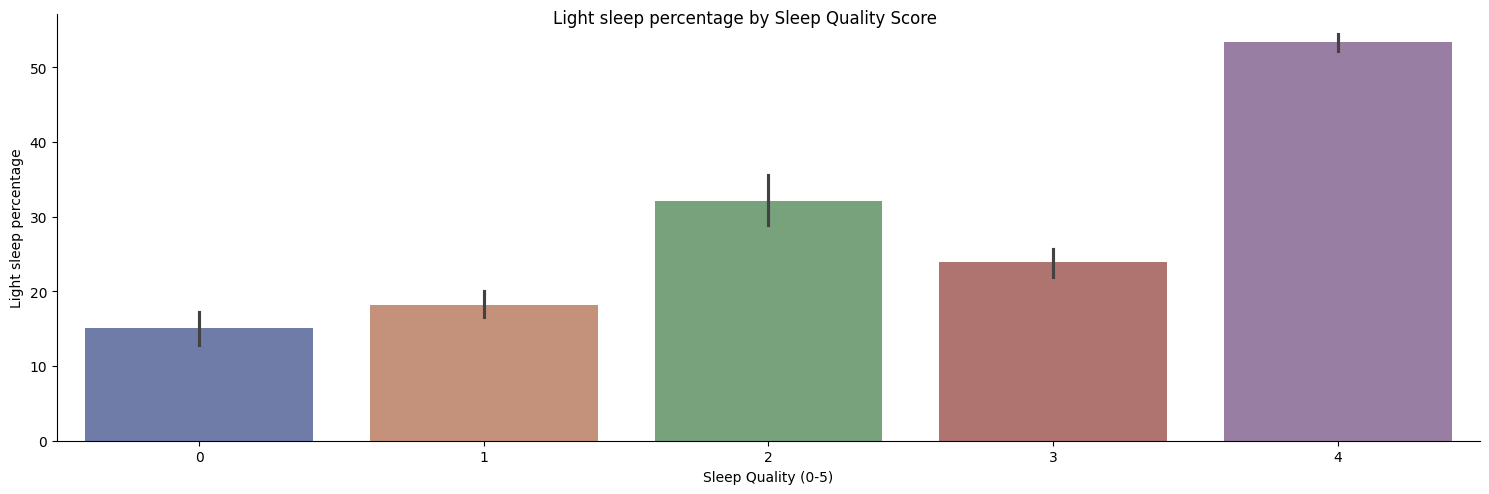

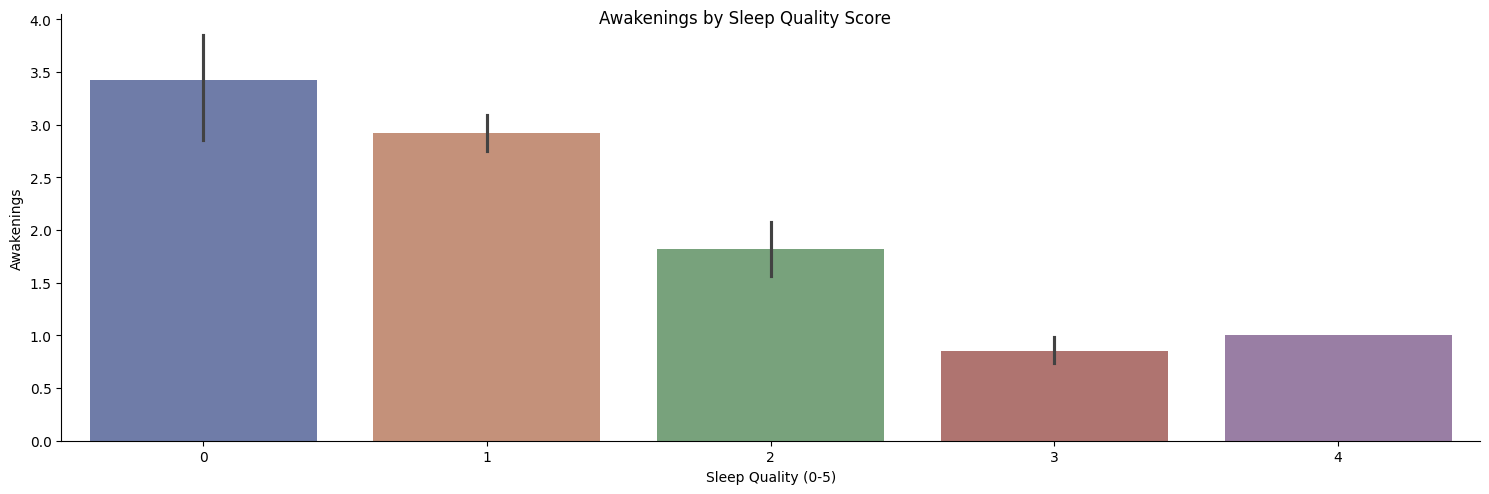

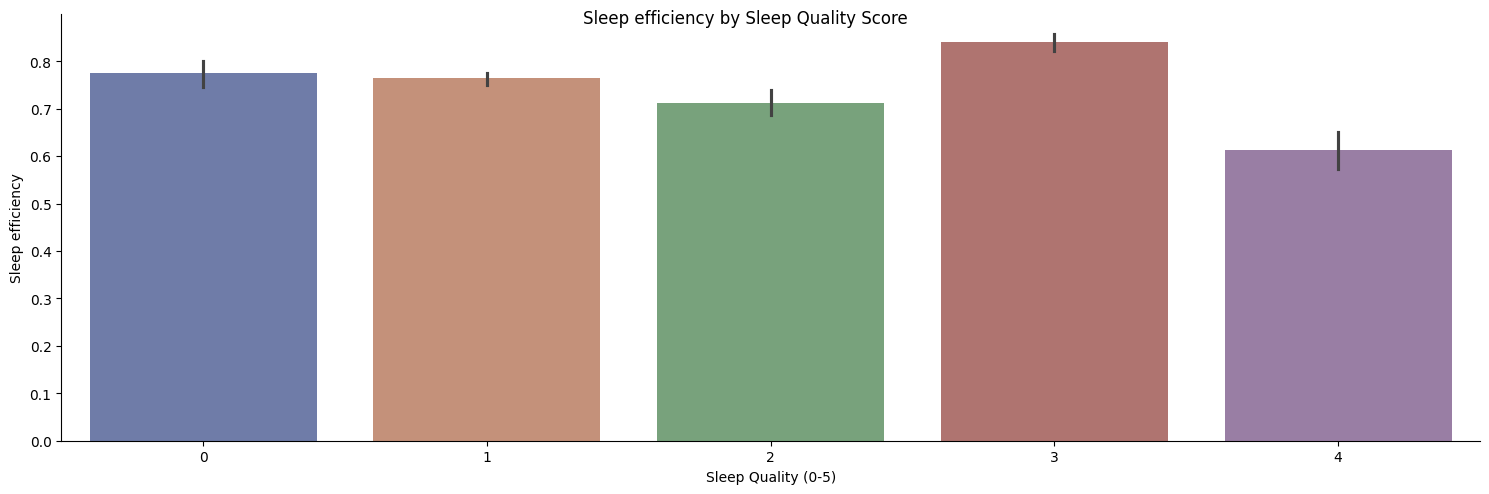

In [16]:
sleep_measurements = ('Sleep duration', 'Deep sleep percentage','Light sleep percentage','Awakenings','Sleep efficiency')

for column in sleep_measurements:
    p = sns.catplot(data = df, 
                    x = 'sleep_quality',
                    y = column,
                    kind = 'bar',
                    palette = 'dark',
                    alpha = .6,
                    height = 5,
                    aspect = 3
                    )

    p.set_axis_labels("Sleep Quality (0-5)", column)
    p.fig.suptitle(f'{column} by Sleep Quality Score')

Conclusion:
From the distributions of each sleep measurement and the sleep quality scores, it appears that the ratio of light and deep sleep for many individuals is the opposite of what it should be. Most people spend the majority of their sleep in a deep sleep as opposed to light sleep. Based on our sleep quality criteria from the Sleep Foundation, about half of an individual's total sleep should be in the light sleep phase.

Recommendations:
Based on the sleep quality results, most people sleep for enough hours and have good sleep efficiency. The largest improvement most people can make is to increase the amount of light sleep they get in relation to their deep sleep and reduce the number of awakenings. There are also other factors that could help in achieving better sleep such as increasing excerise and reducing caffeine intake in the afternoon. It would be helpful if this dataset expanded the definitions of what the excercise frequency feature meant as well as added a time component to the caffeine intake. Below are additional tips from the CDC for improving sleep.

Tips for better sleep
(https://www.cdc.gov/sleep/about_sleep/sleep_hygiene.html)
Get some exercise. Being physically active during the day can help you fall asleep more easily at night.
Avoid large meals, caffeine, and alcohol before bedtime
Be consistent. Go to bed at the same time each night and get up at the same time each morning, including on the weekends
Make sure your bedroom is quiet, dark, relaxing, and at a comfortable temperature
Remove electronic devices, such as TVs, computers, and smart phones, from the bedroom
Thank you for taking the time to review this workbook.

Please feel free leave comments or feedback!

-Ben